<a href="https://colab.research.google.com/github/Raquelsantos242/Calculo-simples/blob/master/Raquel_Braga_DR1_AT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PARTE 1



valor de K que apresenta o melhor desempenho de Acurácia: 12

Resultados para cada valor de k:
k = 2, Acurácia = 0.7996, Precisão = 0.8056, Recall = 0.7996
k = 12, Acurácia = 0.8082, Precisão = 0.8150, Recall = 0.8082
k = 22, Acurácia = 0.7926, Precisão = 0.7988, Recall = 0.7926
k = 32, Acurácia = 0.7869, Precisão = 0.7963, Recall = 0.7869
k = 42, Acurácia = 0.7781, Precisão = 0.7892, Recall = 0.7781
k = 52, Acurácia = 0.7757, Precisão = 0.7928, Recall = 0.7757
k = 62, Acurácia = 0.7689, Precisão = 0.7883, Recall = 0.7689
k = 72, Acurácia = 0.7644, Precisão = 0.7849, Recall = 0.7644
k = 82, Acurácia = 0.7593, Precisão = 0.7772, Recall = 0.7593
k = 92, Acurácia = 0.7499, Precisão = 0.7663, Recall = 0.7499
k = 102, Acurácia = 0.7472, Precisão = 0.7632, Recall = 0.7472
k = 112, Acurácia = 0.7426, Precisão = 0.7585, Recall = 0.7426
k = 122, Acurácia = 0.7415, Precisão = 0.7539, Recall = 0.7415
k = 132, Acurácia = 0.7415, Precisão = 0.7558, Recall = 0.7415
k = 142, Acurácia = 0.7407, Preci

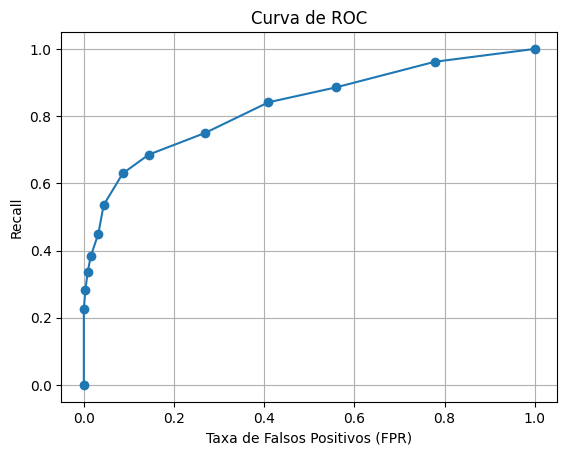

AUC (Precision-Recall): 0.8047


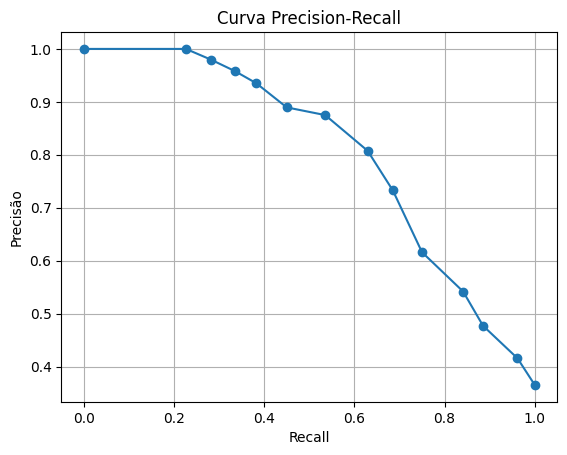

Thresholds (Curva ROC):
    Threshold  TPR (Recall)       FPR
0    1.000000      0.226471  0.000000
1    0.916667      0.282353  0.003384
2    0.833333      0.335294  0.008460
3    0.750000      0.382353  0.015228
4    0.666667      0.450000  0.032149
5    0.583333      0.535294  0.043993
6    0.500000      0.629412  0.086294
7    0.416667      0.685294  0.143824
8    0.333333      0.750000  0.269036
9    0.250000      0.841176  0.409475
10   0.166667      0.885294  0.558376
11   0.083333      0.961765  0.778342
12   0.000000      1.000000  1.000000
Thresholds (Curva Precision-Recall):
    Threshold (Precision-Recall)  Precision    Recall
0                       0.000000   0.365199  1.000000
1                       0.083333   0.415502  0.961765
2                       0.166667   0.477021  0.885294
3                       0.250000   0.541667  0.841176
4                       0.333333   0.615942  0.750000
5                       0.416667   0.732704  0.685294
6                       0.500

In [ ]:
#Uma IA foi utilizada nesse código para correções de sintaxe e interpretação mais rápida de erros
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import precision_score, recall_score, roc_curve, roc_auc_score, precision_recall_curve, auc
import numpy as np
import matplotlib.pyplot as plt


dfEmp = pd.read_csv('/content/Employee.csv')
df = dfEmp.copy()
df = dfEmp.dropna()
nominal_columns = ['Education', 'City', 'Gender', 'EverBenched']


encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_columns = encoder.fit_transform(df[nominal_columns])

encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(nominal_columns))

df = pd.concat([df.drop(nominal_columns, axis=1), encoded_df], axis=1)

X = df.drop('LeaveOrNot', axis=1)
y = df['LeaveOrNot']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
k_values = list(range(2, 201, 10))
kf = KFold(n_splits=20, shuffle=True)

mean_accuracy = []
mean_precision = []
mean_recall = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)

    acc_fold = []
    prec_fold = []
    rec_fold = []

    for train_index, val_index in kf.split(X_train_scaled):
        X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        knn.fit(X_train_fold, y_train_fold)
        y_pred = knn.predict(X_val_fold)

        #o parâmetro average = “weighted” é utilizado por lidar melhor com balanceamento de classes
        acc_fold.append(np.mean(y_pred == y_val_fold))
        prec_fold.append(precision_score(y_val_fold, y_pred, average='weighted'))
        rec_fold.append(recall_score(y_val_fold, y_pred, average='weighted'))

    mean_accuracy.append(np.mean(acc_fold))
    mean_precision.append(np.mean(prec_fold))
    mean_recall.append(np.mean(rec_fold))

best_k = k_values[np.argmax(mean_accuracy)]
print(f'\nvalor de K que apresenta o melhor desempenho de Acurácia: {best_k}')
print()

print("Resultados para cada valor de k:")
for k, acc, prec, rec in zip(k_values, mean_accuracy, mean_precision, mean_recall):
    print(f'k = {k}, Acurácia = {acc:.4f}, Precisão = {prec:.4f}, Recall = {rec:.4f}')


X_test_scaled = scaler.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)
y_probs = knn.predict_proba(X_test_scaled)[:, 1]
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_probs)
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.plot(fpr, tpr, marker='o')
auc_roc = roc_auc_score(y_test, y_probs)

print(f'AUC (ROC): {auc_roc:.4f}')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Recall')
plt.title('Curva de ROC')
plt.grid()
plt.show()

precision, recall, _ = precision_recall_curve(y_test, y_probs)
plt.plot(recall, precision, marker='o')
auc_pr_score = auc(recall, precision)
print(f'AUC (Precision-Recall): {auc_pr_score:.4f}')

plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.grid()
plt.show()

roc_data = {
    'Threshold': thresholds[1:],
    'TPR (Recall)': tpr[1:],
    'FPR': fpr[1:]
}
roc_df = pd.DataFrame(roc_data)
print("Thresholds (Curva ROC):")
print(roc_df)

pr_data2 = {
    'Threshold (Precision-Recall)': thresholds_pr,
    'Precision': precision[:-1],
    'Recall': recall[:-1]
}
pr_df = pd.DataFrame(pr_data2)
print("Thresholds (Curva Precision-Recall):")
print(pr_df)



PARTE 2


[-5.220573765588311, -6.256096229138498, -6.503030690828803, -6.61616714592667, -6.660251925896584, -6.707080489534714, -6.754006817494606, -6.784926504591427, -6.802188104297936]
[-6.462505289450485, -6.508905877167206, -6.639646062297973, -6.69171361543736, -6.727178783426389, -6.759456244490155, -6.806107478695269, -6.825673754250452, -6.838797909932414]




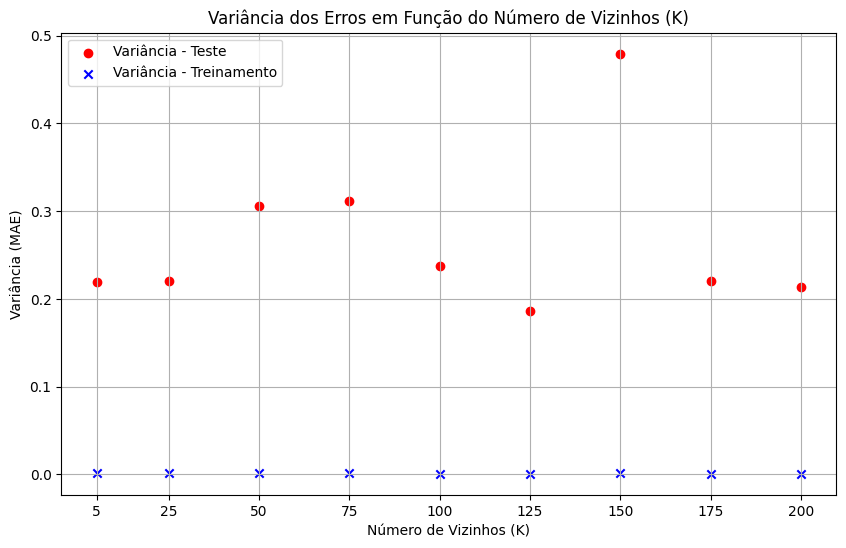

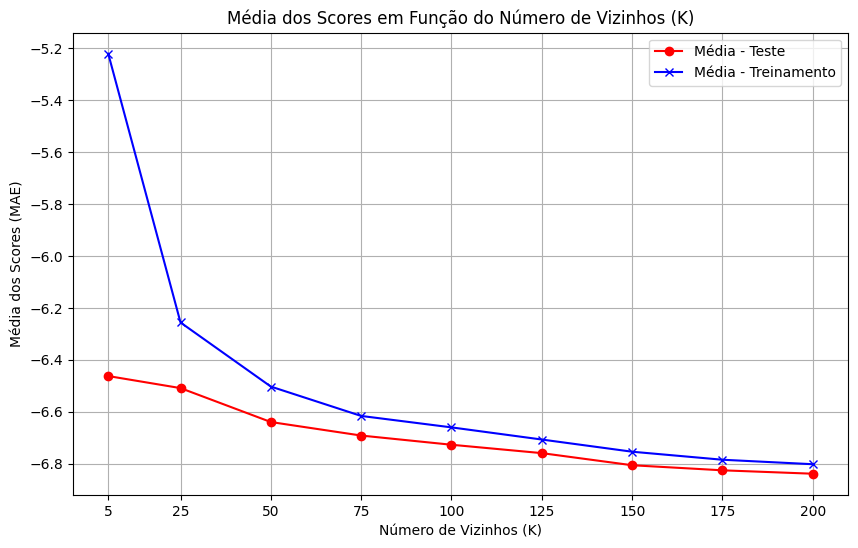

In [ ]:
#Uma IA foi utilizada nesse código para correções de sintaxe e interpretação mais rápida de erros
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection, neighbors
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

dataset_path = '/content/Life Expectancy Data.csv'
datao = pd.read_csv(dataset_path)
data = datao.copy()
data = data.dropna()

target = data['Life expectancy ']
features = data.drop(columns=['Life expectancy '])

k_interval = [5, 25, 50, 75, 100, 125, 150, 175, 200]
kfold = model_selection.KFold(n_splits=20, shuffle=True)

# Codificação one-hot para variáveis categóricas para evitar viés
features = pd.get_dummies(features, drop_first=True)

treino_score_means = []
teste_score_means = []
treino_score_vars = []
teste_score_vars = []

for k in k_interval:
    knn = neighbors.KNeighborsRegressor(n_neighbors=k)

    treino_scores = []
    teste_scores = []

    for train_index, test_index in kfold.split(features):
        X_train, X_test = features.iloc[train_index], features.iloc[test_index]
        y_train, y_test = target.iloc[train_index], target.iloc[test_index]

        knn.fit(X_train, y_train)


        y_train_pred = knn.predict(X_train)
        y_test_pred = knn.predict(X_test)

        treino_scores.append(-mean_absolute_error(y_train, y_train_pred))
        teste_scores.append(-mean_absolute_error(y_test, y_test_pred))

    treino_score_means.append(np.mean(treino_scores))
    teste_score_means.append(np.mean(teste_scores))
    treino_score_vars.append(np.var(treino_scores))
    teste_score_vars.append(np.var(teste_scores))


print(treino_score_means)
print(teste_score_means)
print()
print()

plt.figure(figsize=(10, 6))
plt.scatter(k_interval, teste_score_vars, color='red', label='Variância - Teste', marker='o')
plt.scatter(k_interval, treino_score_vars, color='blue', label='Variância - Treinamento', marker='x')
plt.title('Variância dos Erros em Função do Número de Vizinhos (K)')
plt.xlabel('Número de Vizinhos (K)')
plt.ylabel('Variância (MAE)')
plt.xticks(k_interval)
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(k_interval, teste_score_means, color='red', marker='o', label='Média - Teste')
plt.plot(k_interval, treino_score_means, color='blue', marker='x', label='Média - Treinamento')
plt.title('Média dos Scores em Função do Número de Vizinhos (K)')
plt.xlabel('Número de Vizinhos (K)')
plt.ylabel('Média dos Scores (MAE)')
plt.xticks(k_interval)
plt.legend()
plt.grid()
plt.show()
